## Problem Statement:
### Write a program for image compression using any three compression techniques and compare the results.

In [1]:
%matplotlib inline

import cv2
from cv2 import Mat
from matplotlib import pyplot as plt
import numpy as np

def cv2_imshow(image: Mat) -> None:
    plt.imshow(image)
    plt.show()

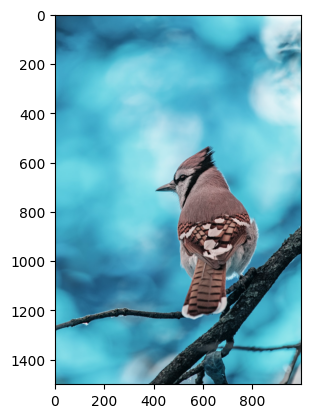

In [2]:
image_path = 'bird_image.jpeg'

image = cv2.imread(image_path)
cv2_imshow(image)

### 1) Run Length Encoding (RLE) Image Compression technique:
This program converts image to grayscale, compresses the image using the run length encoding technique, and then decompresses the image and displays it. The original grayscale and decompressed images should be identical if the compression and decompression were successful.

In [3]:
# convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# initialize an empty list to store the compressed image
compressed_image = []

# get the shape of the image
height, width = gray_image.shape

# iterate over the rows of the image
for row in range(height):
  
  # initialize a variable to store the current pixel value
  cur_pixel = -1
  
  # initialize a variable to store the current run length
  cur_run = 0
  
  # iterate over the columns of the image
  for col in range(width):
    
    # get the pixel value
    pixel = gray_image[row, col]
    
    # check if the pixel value is equal to the current pixel value
    if pixel == cur_pixel:
      
      # increment the current run length
      cur_run += 1
      
    else:
      
      # if the pixel value is different, append the current run to the compressed image
      compressed_image.append((cur_pixel, cur_run))
      
      # update the current pixel value and reset the current run length
      cur_pixel = pixel
      cur_run = 1
      
  # append the last run to the compressed image
  compressed_image.append((cur_pixel, cur_run))


### Decompressing the compressed image for comparison:

In [4]:
# create a new image to store the decompressed image
decompressed_image = np.zeros((height, width), dtype=np.uint8)

# initialize variables to store the current row and column
row = 0
col = 0

# iterate over the elements of the compressed image
for pixel, run_length in compressed_image:
  
  # set the pixel value for the current run
  decompressed_image[row, col:col+run_length] = pixel
  
  # update the column index
  col += run_length
  
  # if the column index is greater than or equal to the width of the image, move to the next row
  if col >= width:
    row += 1
    col = 0



/var/folders/06/_7c3ymxs6xj7dpq03q207cfm0000gn/T/ipykernel_91474/481606839.py:12: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  decompressed_image[row, col:col+run_length] = pixel


Original Image:


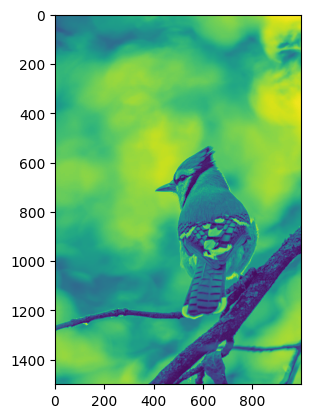

Decompressed Image:


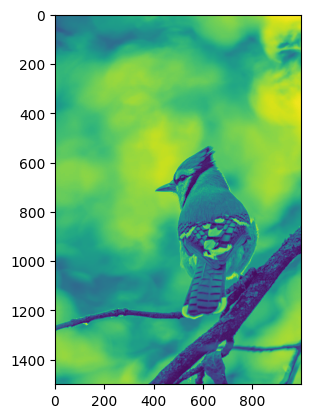

In [5]:
# display the original image
print("Original Image:")
cv2_imshow(gray_image)

# display the decompressed image
print("Decompressed Image:")
cv2_imshow(decompressed_image)

### 2) Discrete Cosine Transform (DCT) Image Compression technique:
This program converts image to grayscale, and divides it into blocks of size 8x8. It then applies the DCT to each block, sets the low frequency coefficients to zero, applies the inverse DCT to the block, and inserts the resulting block into the compressed image. Finally, it displays the original image and the compressed image.

In [6]:
# convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# get the shape of the image
height, width = gray_image.shape

# create a function to compress a region of the image using the DCT image compression technique
def compress_region(region):
  
  # get the shape of the region
  region_height, region_width = region.shape
  
  # apply the DCT to the region
  dct_region = cv2.dct(region.astype(np.float32))
  
  # set the low frequency coefficients to zero
  dct_region[:region_height//8, :region_width//8] = 0
  
  # apply the inverse DCT to the region
  idct_region = cv2.idct(dct_region)
  
  # return the region
  return idct_region

# create a copy of the image to store the compressed image
compressed_image = gray_image.copy()

# iterate over the blocks in the image
for i in range(0, height, 8):
  for j in range(0, width, 8):
    
    # get the current block
    block = gray_image[i:i+8, j:j+8]
    
    # compress the block using the DCT image compression technique
    compressed_block = compress_region(block)
    
    # insert the compressed block into the compressed image
    compressed_image[i:i+8, j:j+8] = compressed_block



/var/folders/06/_7c3ymxs6xj7dpq03q207cfm0000gn/T/ipykernel_91474/2628009218.py:39: RuntimeWarning: invalid value encountered in cast
  compressed_image[i:i+8, j:j+8] = compressed_block


Original Image:


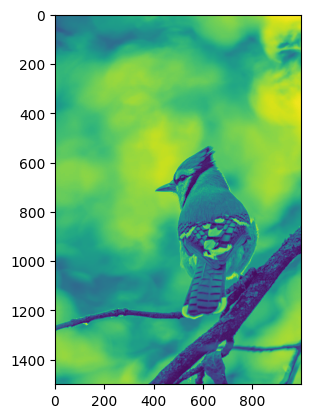

Compressed Image:


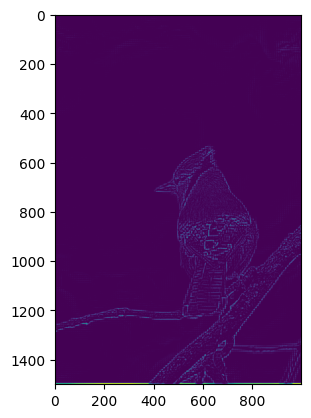

In [7]:
# display the original image
print("Original Image:")
cv2_imshow(gray_image)

# display the decompressed image
print("Compressed Image:")
cv2_imshow(compressed_image)

### 3) Scalar quantization Image Compression technique:
This will load the image, flatten it into a 1D array, divide the range of pixel values into levels equally spaced intervals, find the mean value of each interval, quantize the pixel values by replacing them with the mean value of their interval, and then reshape the quantized image back into its original shape.

In [8]:
def quantize(image, levels):
    # Flatten the image into a 1D array
    flat_image = image.flatten()
    
    # Find the min and max pixel values
    min_val = flat_image.min()
    max_val = flat_image.max()
    
    # Divide the range of pixel values into equally spaced intervals
    interval = (max_val - min_val) / levels
    intervals = [min_val + i * interval for i in range(levels + 1)]
    
    # Find the mean value of each interval
    means = [sum(intervals[i:i+2]) / 2 for i in range(levels)]
    
    # Quantize the pixel values by replacing them with the mean value of their interval
    quantized_image = np.array([means[np.searchsorted(intervals, val) - 1] for val in flat_image])
    
    # Reshape the quantized image back into its original shape
    return quantized_image.reshape(image.shape)


quantized_image = quantize(image, 16)

Original Image:


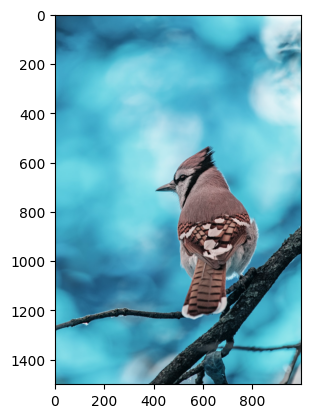

Compressed Image:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


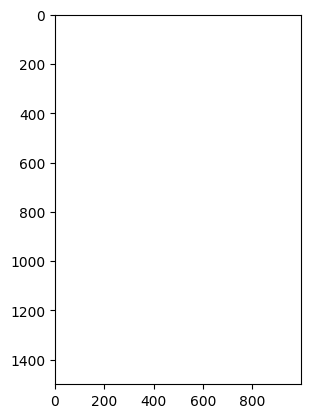

In [9]:
# display the original image
print("Original Image:")
cv2_imshow(image)

# display the decompressed image
print("Compressed Image:")
cv2_imshow(quantized_image)